In [20]:
import cv2 as cv
import argparse
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import os

from IPython.display import HTML, display
from IPython.display import IFrame
from IPython.display import YouTubeVideo
from IPython.display import Video

import group_emotion.gen.generator as ge_gen
import group_emotion.repr.representer as ge_rep

# for showing float values upto 2 decimal places
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# make this notebook to fill screen width
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# Group emotion simulation

# initial value
# Happy, Not happy, Undefined
# Engaged, Not engaged, Undefined
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])

happiness_probability = np.array([[0, 0, 1]])
engagedness_probability = np.array([[0, 0, 1]])

In [ ]:
##Settings of concatenated image
# max_width = 1200 
# max_height = 900 
max_width = 500 
max_height = 500
# TODO: make all of the input images sa

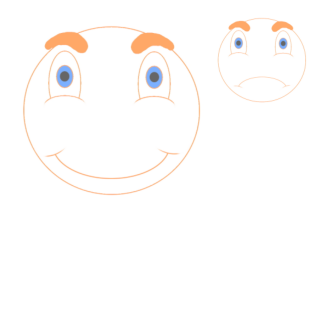

In [35]:
# case 0:
happy_percent = 40
sad_percent = 20
unknown_percent = 40
er = ge_rep.emotion_representer(max_width, max_height, 'happy.png', 'sad.png')
happyness_image = er.get_repr(happy_percent, sad_percent, unknown_percent)
ge_rep.display_image(happyness_image, figsize=(5, 4))

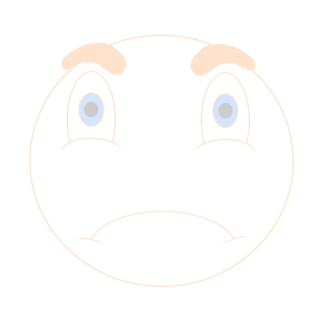

In [36]:
# case 1:
happyness_image = er.get_repr(0, 20, 80)
ge_rep.display_image(happyness_image, figsize=(5, 4))

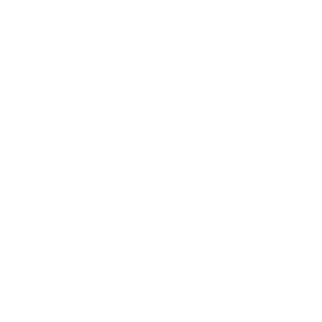

In [37]:
# case 2:
happyness_image = er.get_repr(0, 0, 100)
ge_rep.display_image(happyness_image, figsize=(5, 4))

In [22]:
er = ge_rep.emotion_representer(max_width, max_height, 'happy.png', 'sad.png')

img = [] # some array of images
frames = [] # for storing the generated images


# figure size in units
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure(figsize=(max_width * px, max_height * px), dpi= 100, facecolor='w', edgecolor='k')
# fig = plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')

plt.title('happiness')

for i in range(int(20)):
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.5)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
#     engagedness = ge_gen.change_transition_matrix(engagedness, change_probability=0.2)
#     engagedness_probability = ge_gen.update_probability(engagedness_probability, engagedness)
    
    happy_percent = happiness_probability[0, 0]
    sad_percent = happiness_probability[0, 1]
    unknown_percent = happiness_probability[0, 2]
    
    happiness_image = er.get_repr(happy_percent, sad_percent, unknown_percent)
    
    happiness_image = happiness_image.astype('float32') * 255
#     print(happiness_image.shape)
#     frames.append([plt.imshow(happiness_image, cmap=cm.Greys_r, animated=True)])
    frames.append([plt.imshow(cv.cvtColor(happiness_image, cv.COLOR_BGRA2RGB).astype('uint8'), cmap=cm.Greys_r, animated=True)])
    
    
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)
plt.axis('off')
plt.close()
try:
    os.mkdir('output')
except FileExistsError:
    print('output exists.')
ani.save('output/happy.mp4')

output exists.


In [28]:
er = ge_rep.emotion_representer(max_width, max_height, 'happy_abstract.png', 'sad_abstract.png')

img = [] # some array of images
frames = [] # for storing the generated images

# figure size in units
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure(figsize=(max_width * px, max_height * px), dpi= 100, facecolor='w', edgecolor='k')

plt.title('happiness')

for i in range(int(20)):
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.5)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
    happy_percent = happiness_probability[0, 0]
    sad_percent = happiness_probability[0, 1]
    unknown_percent = happiness_probability[0, 2]
    
    happiness_image = er.get_repr(happy_percent, sad_percent, unknown_percent)
    happiness_image = happiness_image.astype('float32') * 255
    frames.append([plt.imshow(cv.cvtColor(happiness_image, cv.COLOR_BGRA2RGB).astype('uint8'), cmap=cm.Greys_r, animated=True)])
    
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)
plt.axis('off')
plt.close()
try:
    os.mkdir('output')
except FileExistsError:
    print('output exists.')
ani.save('output/happy_abstract.mp4')

output exists.


In [33]:
er = ge_rep.emotion_representer(max_width, max_height, 'engaged.png', 'disengaged.png')

img = [] # some array of images
frames = [] # for storing the generated images

# figure size in units
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure(figsize=(max_width * px, max_height * px), dpi= 100, facecolor='w', edgecolor='k')

plt.title('engagedness')

for i in range(int(20)):
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.5)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
    happy_percent = happiness_probability[0, 0]
    sad_percent = happiness_probability[0, 1]
    unknown_percent = happiness_probability[0, 2]
    
    happiness_image = er.get_repr(happy_percent, sad_percent, unknown_percent)
    happiness_image = happiness_image.astype('float32') * 255
    frames.append([plt.imshow(cv.cvtColor(happiness_image, cv.COLOR_BGRA2RGB).astype('uint8'), cmap=cm.Greys_r, animated=True)])
    
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)
plt.axis('off')
plt.close()
try:
    os.mkdir('output')
except FileExistsError:
    print('output exists.')
ani.save('output/engagedness.mp4')

output exists.


In [34]:
er = ge_rep.emotion_representer(max_width, max_height, 'engaged_abstract.png', 'disengaged_abstract.png')

img = [] # some array of images
frames = [] # for storing the generated images

# figure size in units
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig = plt.figure(figsize=(max_width * px, max_height * px), dpi= 100, facecolor='w', edgecolor='k')

plt.title('engagedness')

for i in range(int(20)):
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.5)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
    happy_percent = happiness_probability[0, 0]
    sad_percent = happiness_probability[0, 1]
    unknown_percent = happiness_probability[0, 2]
    
    happiness_image = er.get_repr(happy_percent, sad_percent, unknown_percent)
    happiness_image = happiness_image.astype('float32') * 255
    frames.append([plt.imshow(cv.cvtColor(happiness_image, cv.COLOR_BGRA2RGB).astype('uint8'), cmap=cm.Greys_r, animated=True)])
    
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)
plt.axis('off')
plt.close()
try:
    os.mkdir('output')
except FileExistsError:
    print('output exists.')
ani.save('output/engagedness_abstract.mp4')

output exists.


In [ ]:
# display(HTML("<style>.container { width:100% !important; }</style>"))
HTML("""
<video controls autoplay width="900">
  <source src="output/movie.mp4" type="video/mp4">
</video>
""")

In [ ]:
# display(HTML("<style>.container { width:100% !important; }</style>"))
HTML("""
<video controls autoplay width="900">
  <source src="images/meetingView.webm" type="video/webm">
</video>
""")